## Exercice 4 

In [1]:
# importation des librairies usuelles
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
#from scipy.special import factorial

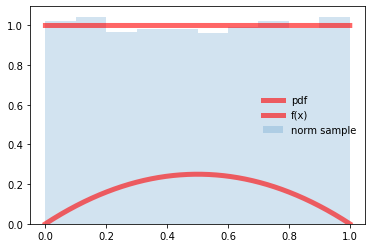

In [2]:
N_spl = 10000
unif = stats.uniform()                             # création du générateurs [0,1]
sample_X = unif.rvs(size=N_spl)                    # tirage d'une liste de N_spl nombres
sample_Y = unif.rvs(size=N_spl)                    
sample = list(zip(sample_X, sample_Y))             # création d'une liste de points 

# Fonction de densité de probabilité
x = np.linspace(0,1, N_spl)
f_x = x * (1 - x)
f_spl = sample_X * (1 - sample_X)
plt.plot(x,unif.pdf(x),'r-', lw=5, alpha=0.6, label='pdf') 
plt.plot(x,f_x,'r-', lw=5, alpha=0.6, label='f(x)')
plt.hist(sample_X, density=True, histtype='stepfilled', alpha=0.2,label="norm sample") 
plt.legend(loc='best', frameon=False)
plt.show()



# 1- Calcul de l'intégrale par Monte Carlo
On génère aléatoirement N_spl points sur U = [0,1]x[0,1]. L'intégrale s'obtient par le rapport du point sous la courbe et du nombre de points générés sur U : 
$$ I = \frac{N_{sous la courbe}}{N_{spl}} S$$

où S correspond à l'aire de la suface [0,1]x[0,1] à laquelle appartiennent les points générés.

In [3]:
# Trie des points générés aléatoirement :

sample_sous = []                  # stock les points sous la courbe
sample_dessus = []                # stock les points au dessus de la courbe

for i in range(N_spl):
    if sample[i][1] < f_spl[i]:
        sample_sous.append(sample[i])
    else:
        sample_dessus.append(sample[i])

# Estimation du nombre de point générés aléatoirement sous la courbe :
N_sous = len(sample_sous)  


# estimation de l'intégrale par la méthode de Monte Carlo :
S = 1                              # surface sur laquelle sont générés les points
I = N_sous / N_spl * S


print(I)

0.1645


Pour s'assurer de la cohérece du résultat  nous avons essayer plusieurs valeurs de N_spl (1000, 10000, 100000), la somme converge vers $ \frac{1}{6}$.

# 2- Calcul de l'incertitude

L'incertitude sur I est donnée par : $ \Delta I=\sqrt{Var[I]} =\frac{I}{n_{spl}} \sqrt{\frac{1-\frac{I}{S}}{\frac{I}{S}}}$


    

In [4]:
P = I/S
u_I = I/N_spl * np.sqrt((1 - P)/P)

print(u_I)

3.707286743698145e-05


# 3- Représentation graphique 

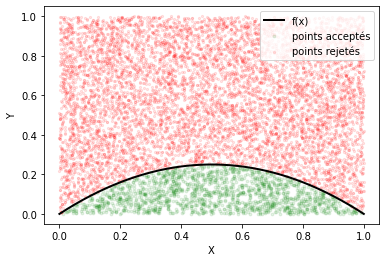

In [5]:
plt.plot(x, f_x, 'k-', lw=2, label='f(x)')
plt.scatter(*zip(*sample_sous), color='green', alpha=0.1, s=8, label='points acceptés')
plt.scatter(*zip(*sample_dessus), color='red', alpha=0.1, s=5, label='points rejetés')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='best')
plt.show()

# Exercice 5